In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import seaborn as sns
from df_functions import read_csv_file, split_and_reformat, clean_reqlogs, calculate_variance, count_unique_reqs
from vectorize import vectorizer

In [7]:
df_anomaly = pd.read_csv('calculations.csv')

anomaly_inputs = ['request_freq', 'avg_tokens', 'longest_consec', 'var_score']

model_if = IsolationForest(contamination=0.005, random_state=42)
model_if.fit(df_anomaly[anomaly_inputs])

c:\Users\vhage\Documents\Skolarbete\Exjobb\request-analyzer-model\.venv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.005, random_state=42)

In [8]:
df_anomaly['anomaly_score'] = model_if.decision_function(df_anomaly[anomaly_inputs])
df_anomaly['anomaly'] = model_if.predict(df_anomaly[anomaly_inputs])

#This dataframe will only include anomaly score and anomaly label
df_anomaly_score = df_anomaly.loc[:,['anomaly_score', 'anomaly']]
df_anomaly_score['user'] = df_anomaly['user']
df_anomaly_score.loc[df_anomaly_score['anomaly']==-1] 

,anomaly_score,anomaly,user
95,-0.018259,-1,user-1003
666,-0.036250,-1,user-1005
884,-0.023921,-1,user-1005
995,-0.000132,-1,user-1005
1002,-0.011418,-1,user-1005
1007,-0.000149,-1,user-1005
1188,-0.009983,-1,user-1005
1434,-0.024547,-1,user-1005
1456,-0.015988,-1,user-1005
1578,-0.000149,-1,user-1005


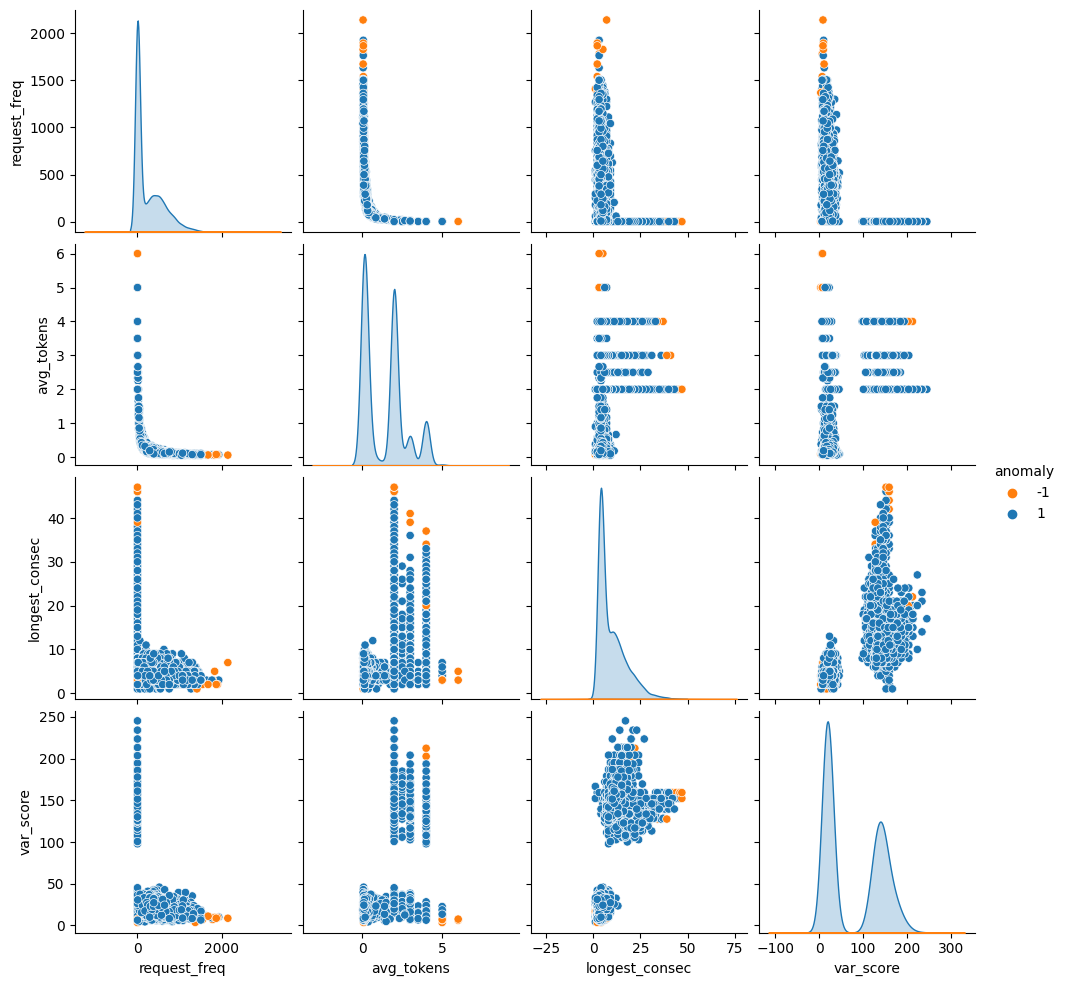

In [9]:
#Plots showcasing the outliers detected by isolation forest
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_anomaly, vars=anomaly_inputs, hue='anomaly', palette=palette)